# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [358]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split 

In [359]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [360]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [361]:
X = boston.data
y = boston.target

# 3. Train test split

In [362]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3)

# 4. Simple Linear Model

In [363]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [364]:
model.score(xtest,ytest)

0.7273161413497724

In [365]:
model.score(xtrain,ytrain)

0.7405631133419196

# 5. Ridge Regularization for Linear Model

In [366]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha=224)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.6908096252715736

In [367]:
modelr.score(xtest,ytest)

0.7061532517357185

# 6. Lasso Regularization for Linear Model

In [368]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=224)
modelL.fit(xtrain,ytrain)
modelL.score(xtrain,ytrain)

0.1883059301498805

In [369]:
modelL.score(xtest,ytest)

0.1994811822443775

# 7. Polynomial Regression of degree 2

In [370]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrainpoly = pf.fit_transform(xtrain)
xtestpoly = pf.fit_transform(xtest)

In [371]:
lrp=LinearRegression()
lrp.fit(xtrainpoly,ytrain)
lrp.score(xtrainpoly,ytrain)

0.9360615343650215

In [372]:
lrp.score(xtestpoly,ytest)

0.827754385708372

# 8. Ridge Regularization for Polynomial model

In [373]:
modelR = Ridge(alpha=500)
modelR.fit(xtrainpoly,ytrain)
modelR.score(xtrainpoly,ytrain)

0.8974417974780508

In [374]:
modelR.score(xtestpoly,ytest)

0.8683227280776555

# 9. Lasso Regularization for Polynomial model

In [375]:
modell = Lasso(alpha=5)
modell.fit(xtrainpoly,ytrain)
modell.score(xtrainpoly,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.340e+03, tolerance: 2.965e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8578469666902349

In [376]:
modell.score(xtestpoly,ytest)

0.8221652048187655

# 10. Select K Best

In [377]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# kb = SelectKBest(score_func=f_regression,k=7)
# x_selected=kb.fit_transform(xtrain,ytrain)
# x_selected.shape
# x_selected[0]

In [378]:
# columns = ['LSTAT','ZN','INDUS','RM']

In [379]:
# test_selected=kb.fit_transform(xtest,ytest)
# test_selected[0]

In [380]:
# Klr = LinearRegression()
# Klr.fit(x_selected,ytrain)
# Klr.score(x_selected,ytrain)


In [381]:
# Klr.score(test_selected,ytest)

In [382]:
# kpf = PolynomialFeatures(degree=2)
# xktrainpoly = kpf.fit_transform(x_selected)
# xktestpoly = kpf.fit_transform(test_selected)

In [383]:
# klrp=LinearRegression()
# klrp.fit(xktrainpoly,ytrain)
# klrp.score(xktrainpoly,ytrain)

In [384]:
# klrp.score(xktestpoly,ytest)

In [385]:
traindf = pd.DataFrame(data=xtrain, columns=boston.feature_names)
tdf = pd.DataFrame(data=xtest, columns=boston.feature_names)
traindf['target']=ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.07022   0.0   4.05   0.0  0.510  6.020  47.2  3.5549  5.0  296.0   
1  0.17446   0.0  10.59   1.0  0.489  5.960  92.1  3.8771  4.0  277.0   
2  0.07165   0.0  25.65   0.0  0.581  6.004  84.1  2.1974  2.0  188.0   
3  0.01870  85.0   4.15   0.0  0.429  6.516  27.7  8.5353  4.0  351.0   
4  0.47547   0.0   9.90   0.0  0.544  6.113  58.8  4.0019  4.0  304.0   

   PTRATIO       B  LSTAT  target  
0     16.6  393.23  10.11    23.2  
1     18.6  393.25  17.27    21.7  
2     19.1  377.67  14.27    20.3  
3     17.9  392.43   6.36    23.1  
4     18.4  396.23  12.73    21.0

In [386]:
correl = traindf.corr()

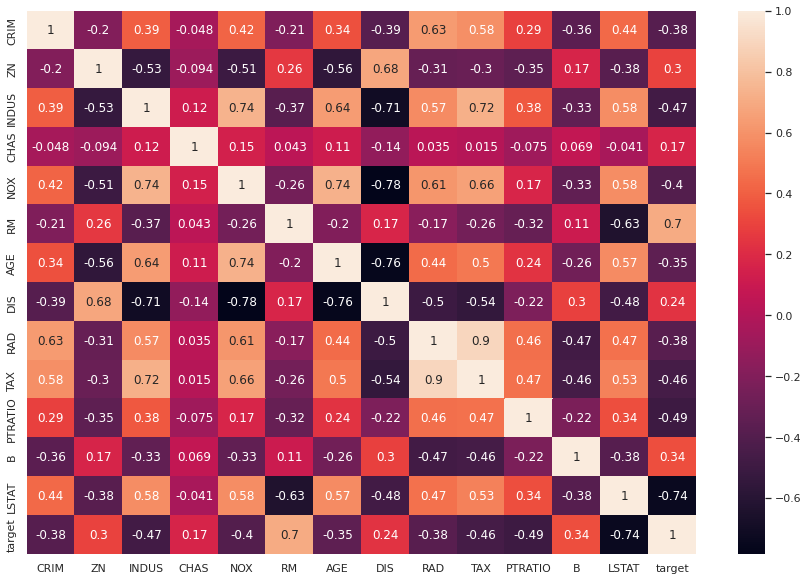

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=correl,annot=True)
plt.show()

In [388]:
selected_columns=['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']

In [389]:
train_selected=traindf[selected_columns]
test_selected=tdf[selected_columns]
test_selected.head()

CRIM  INDUS     NOX     RM    TAX  PTRATIO  LSTAT
0  0.23912   9.69  0.5850  6.019  391.0     19.2  12.92
1  0.12204   2.89  0.4450  6.625  276.0     18.0   6.65
2  0.02009   2.68  0.4161  8.034  224.0     14.7   2.88
3  0.14052  10.59  0.4890  6.375  277.0     18.6   9.38
4  0.17505   5.96  0.4990  5.966  279.0     19.2  10.13

In [390]:
kmodel = LinearRegression()
kmodel.fit(train_selected,ytrain)
kmodel.score(train_selected,ytrain)

0.6888097692031018

In [391]:
kmodel.score(test_selected,ytest)

0.6615697297665457

# 11. Conclusion

We use Lasso and Ridge model of regularized regression and feature selection methods to overcome overfitting of data. So after testing and training these models to our dataset, we see that Lasso model best fits our dataset and gives higher accuracy to train and test datasets compared to other models. 